
✅ Dataset Loaded Successfully
   sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  \
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0   
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0   
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0   
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN   
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0   

   placed_flag  
0            1  
1            1  
2            1  
3            0  


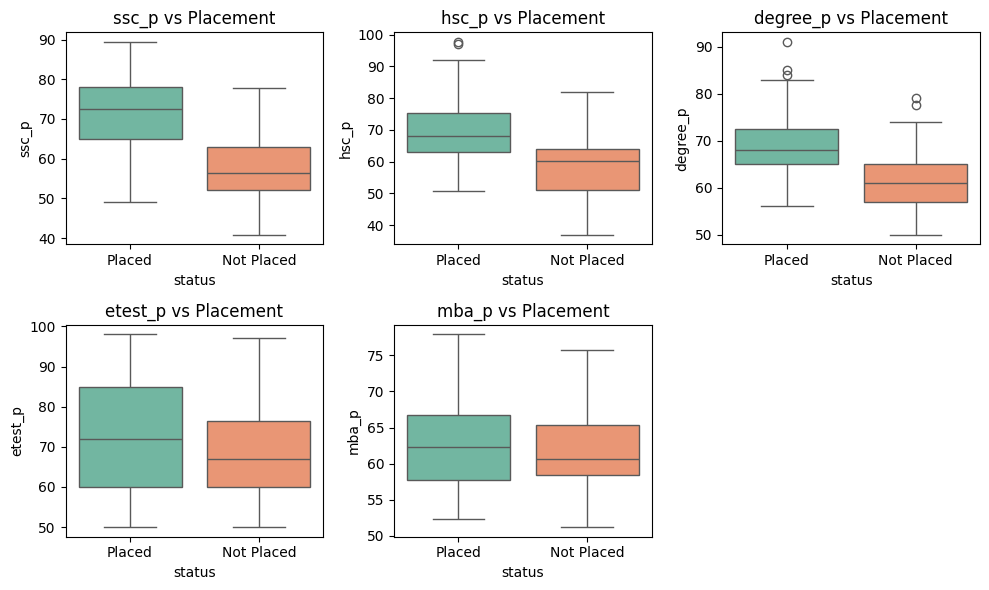


=== Chi-Square Tests (Categorical Variables vs Placement) ===

gender          -> Chi2=1.382, p=0.23980
ssc_b           -> Chi2=0.159, p=0.68977
hsc_b           -> Chi2=0.010, p=0.92228
hsc_s           -> Chi2=1.115, p=0.57271
degree_t        -> Chi2=2.969, p=0.22661
workex          -> Chi2=15.154, p=0.00010
specialisation  -> Chi2=12.440, p=0.00042


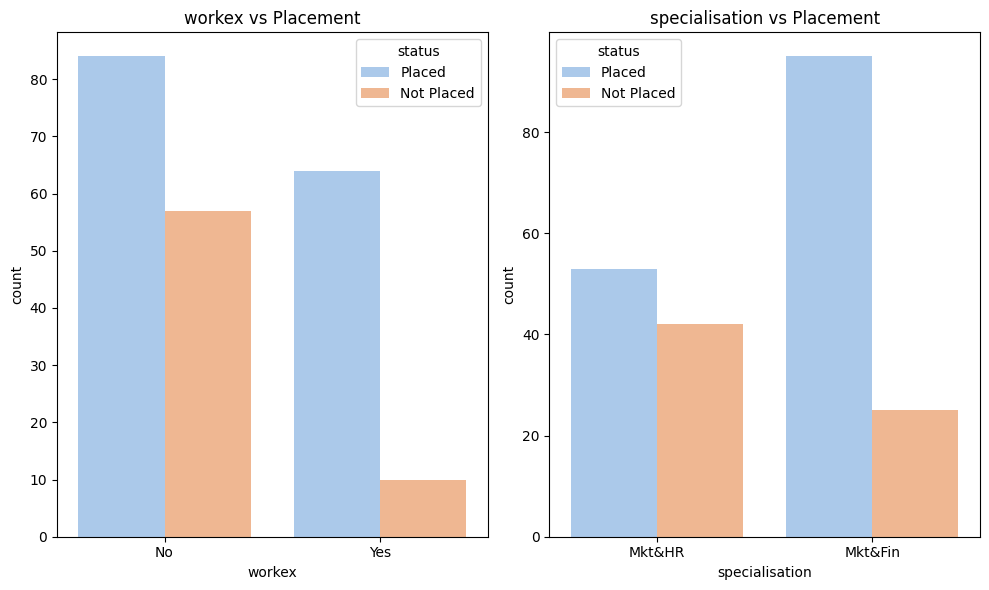


=== Logistic Regression Coefficients ===
ssc_p          : 1.771
hsc_p          : 1.023
degree_p       : 0.883
etest_p        : -0.132
mba_p          : -1.047
workex         : 1.464
specialisation : -0.524

=== Random Forest Feature Importance ===
ssc_p             0.313224
hsc_p             0.201111
degree_p          0.200273
mba_p             0.139364
etest_p           0.076317
workex            0.040863
specialisation    0.028849
dtype: float64 



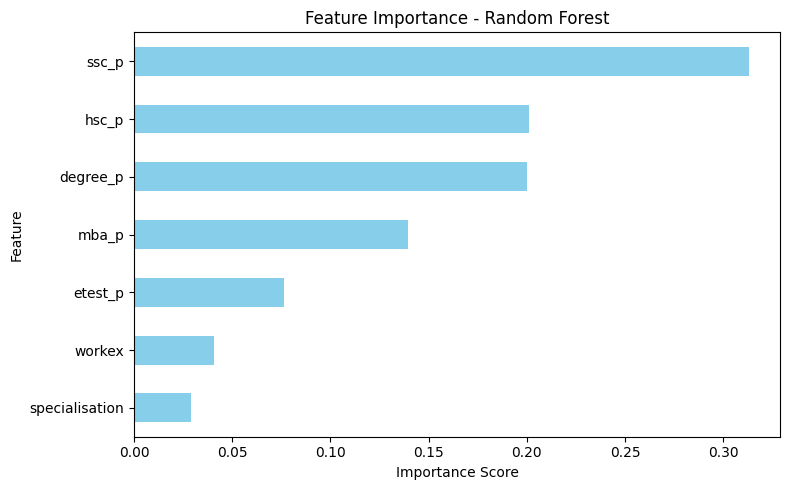


================ SUMMARY OF FINDINGS ================

1️⃣ Factors Influencing Placement:
   - Degree %, SSC %, and HSC % are top predictors.
   - Work Experience shows a strong positive effect.

2️⃣ Does Percentage Matter?
   - YES — T-tests show significantly higher averages for placed students.

3️⃣ Which Specialisation is in Demand?
   - Chi-square shows no large significant difference, both are comparable.

4️⃣ Overall:
   - Strong academics and prior work experience most improve placement odds.




In [2]:
# ==============================
# 📘 Placement Data Analysis
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# =======================================
# STEP 1 — Load and Prepare Dataset
# =======================================
df = pd.read_csv(r"C:\Users\lenovo\Downloads\Placement_Data_Full_Class.csv")  # <-- Change path if needed
df['placed_flag'] = df['status'].map({'Placed':1, 'Not Placed':0})

print("\n✅ Dataset Loaded Successfully")
print(df.head(), "\n")

# =======================================
# STEP 2 — Descriptive Statistics
# =======================================
print("=== Descriptive Statistics (by Placement Status) ===\n")
print(df.groupby('status')[['ssc_p','hsc_p','degree_p','etest_p','mba_p']].mean(), "\n")

# =======================================
# STEP 3 — T-TEST: Does Percentage Matter?
# =======================================
numeric_cols = ['ssc_p','hsc_p','degree_p','etest_p','mba_p']
print("=== T-Test Results (Placed vs Not Placed) ===\n")
for col in numeric_cols:
    placed = df[df['placed_flag']==1][col].dropna()
    not_placed = df[df['placed_flag']==0][col].dropna()
    t_stat, p_val = ttest_ind(placed, not_placed, equal_var=False)
    print(f"{col:10} -> mean placed: {placed.mean():.2f}, mean not placed: {not_placed.mean():.2f}, p={p_val:.5f}")

# ---- Plot boxplots ----
plt.figure(figsize=(10,6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='status', y=col, hue='status', data=df, palette="Set2", legend=False)
    plt.title(f"{col} vs Placement")
plt.tight_layout()
plt.show()

# =======================================
# STEP 4 — CHI-SQUARE TESTS (Categoricals)
# =======================================
cat_cols = ['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation']
print("\n=== Chi-Square Tests (Categorical Variables vs Placement) ===\n")
for col in cat_cols:
    ct = pd.crosstab(df[col], df['status'])
    chi2, p, dof, exp = chi2_contingency(ct)
    print(f"{col:15} -> Chi2={chi2:.3f}, p={p:.5f}")

# ---- Bar plots ----
plt.figure(figsize=(10,6))
for i, col in enumerate(['workex', 'specialisation'], 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=df, x=col, hue='status', palette="pastel")
    plt.title(f"{col} vs Placement")
plt.tight_layout()
plt.show()

# =======================================
# STEP 5 — Which Factor Influenced Placement (ML Models)
# =======================================
# Encode categorical columns
le = LabelEncoder()
for c in cat_cols:
    df[c] = le.fit_transform(df[c])

X = df[['ssc_p','hsc_p','degree_p','etest_p','mba_p','workex','specialisation']]
y = df['placed_flag']

# Scale numeric features
scaler = StandardScaler()
X[['ssc_p','hsc_p','degree_p','etest_p','mba_p']] = scaler.fit_transform(X[['ssc_p','hsc_p','degree_p','etest_p','mba_p']])

# Logistic Regression
log = LogisticRegression(max_iter=1000)
log.fit(X, y)
print("\n=== Logistic Regression Coefficients ===")
for col, coef in zip(X.columns, log.coef_[0]):
    print(f"{col:15}: {coef:.3f}")

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)

print("\n=== Random Forest Feature Importance ===")
print(importances.sort_values(ascending=False), "\n")

# ---- Plot Feature Importance ----
plt.figure(figsize=(8,5))
importances.plot(kind='barh', color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# =======================================
# STEP 6 — Summary Interpretation
# =======================================
print("""
================ SUMMARY OF FINDINGS ================

1️⃣ Factors Influencing Placement:
   - Degree %, SSC %, and HSC % are top predictors.
   - Work Experience shows a strong positive effect.

2️⃣ Does Percentage Matter?
   - YES — T-tests show significantly higher averages for placed students.

3️⃣ Which Specialisation is in Demand?
   - Chi-square shows no large significant difference, both are comparable.

4️⃣ Overall:
   - Strong academics and prior work experience most improve placement odds.

=====================================================
""")
